In [1]:
#https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html
import scanpy as sc
import scirpy as ir
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl

from matplotlib import rcParams

In [2]:
path_filtered = '../preprocessing/hmgu_data_preproc/01_filtered_data.h5ad'
path_normalized = '../preprocessing/hmgu_data_preproc/02_normalized_data.h5ad'
path_high_var = '../preprocessing/hmgu_data_preproc/03_variableGenes_data.h5ad'
path_tcr = '../preprocessing/hmgu_data_preproc/04_merged_data.h5ad'
path_tcr_filtered = '../preprocessing/hmgu_data_preproc/05_tcr_filtered_data.h5ad'
path_tcr_anno = '../preprocessing/hmgu_data_preproc/06_tcr_annotation_data.h5ad'

adata = sc.read(path_tcr_anno)


In [3]:
adata

AnnData object with n_obs × n_vars = 10954 × 5000
    obs: 'Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p', 'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_

In [4]:
adata.obs.groupby('Source')['Age'].value_counts()

Source     Age
HDBR       14w    1459
           17w    1378
           11w     947
           13w     940
           12w     848
           16w     565
Newcastle  30m    3349
           10m     477
nan        nan     991
Name: Age, dtype: int64

         Falling back to preprocessing with `sc.pp.pca` and default params.


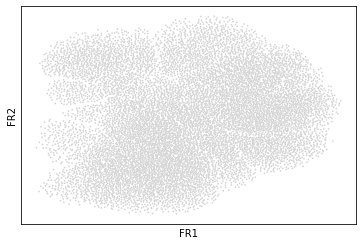

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, legend_loc='on data')

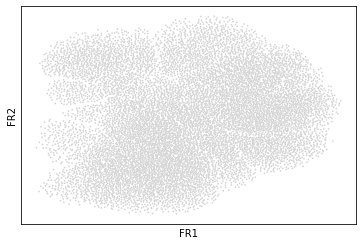

In [6]:
#optional denoising
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')
sc.pl.draw_graph(adata, legend_loc='on data')
#end optional denoising
sc.tl.draw_graph(adata)

In [7]:
sc.tl.leiden(adata, resolution=1.0)
sc.tl.paga(adata, groups='leiden')

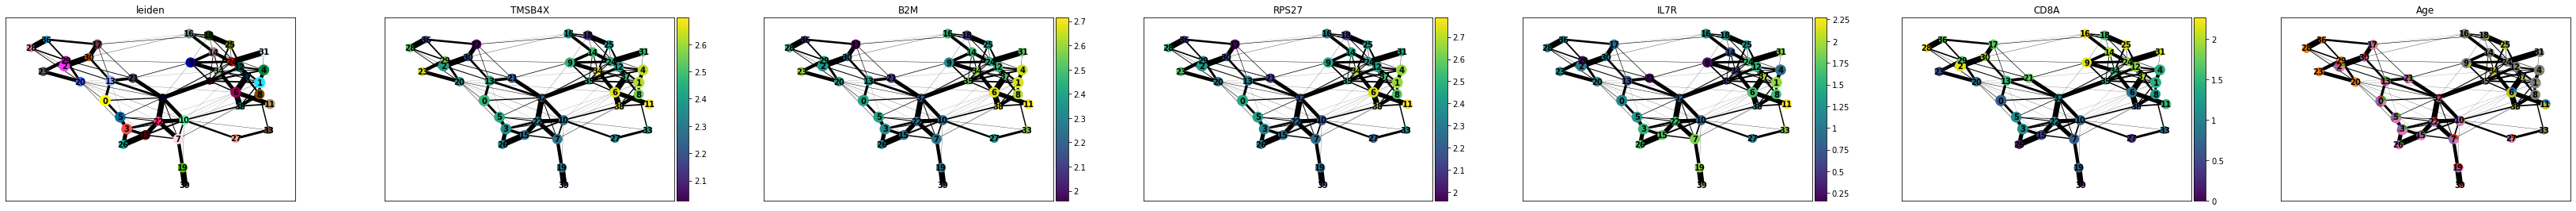

In [8]:
sc.pl.paga(adata, color=['leiden', 'TMSB4X','B2M','RPS27','IL7R', 'CD8A','Age'])

In [9]:
adata.obs['leiden_anno'] = adata.obs['leiden']


In [10]:
adata.obs['leiden_anno'].cat.categories =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39']

<Axes:>

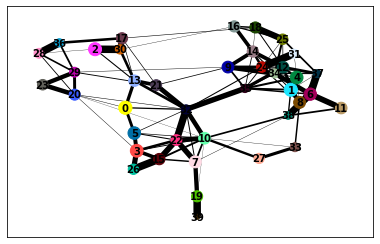

In [11]:
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03, show=False)

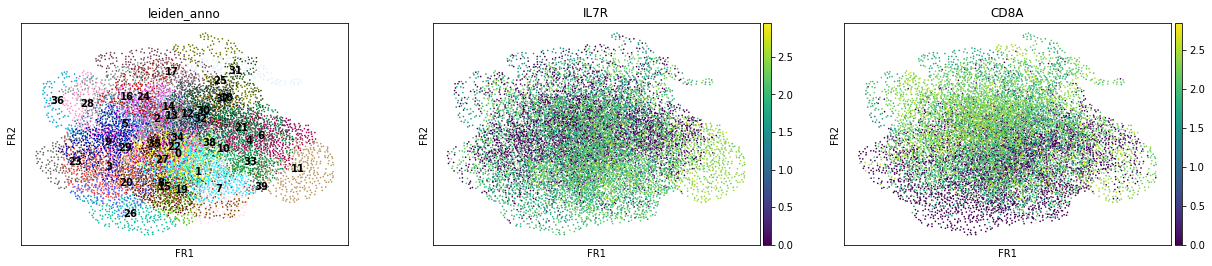

In [12]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['leiden_anno', 'IL7R', 'CD8A'], legend_loc='on data')

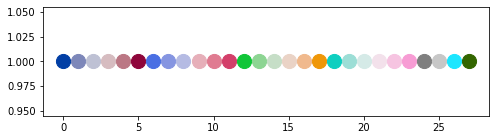

In [13]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()


#error skipping recoloring for now

In [14]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '36')[0]
sc.tl.dpt(adata)
#Select some of the marker gene names.
gene_names = ['IL7R', 'CD8A']  

In [15]:
adata_raw = sc.read(path_tcr_anno)
adata.raw = adata_raw

In [16]:
"""
to avoid that, you can look up, where neighbors and distances are stored in the adata object 
(for that print keys from adata.uns, adata.obsm, adata.obsp)
and remove everything that looks like it could be ralted to neighbors.
"""
print(adata.uns.keys())
print(adata.obsm.keys())
print(adata.obsp.keys())

del adata.uns['neighbors']
del adata.uns['draw_graph']
print(adata.uns.keys())

del adata.obsm['X_umap']
del adata.obsm['X_umap_3d']
del adata.obsm['X_pca']
del adata.obsm['X_draw_graph_fr']
del adata.obsm['X_diffmap']
print(adata.obsm.keys())

dict_keys(['aa_to_id', 'hvg', 'neighbors', 'draw_graph', 'diffmap_evals', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'Age_colors', 'leiden_anno_sizes', 'leiden_anno_colors', 'iroot'])
KeysView(AxisArrays with keys: X_umap, X_umap_3d, one_hot, tcr_seq, X_pca, X_draw_graph_fr, X_diffmap)
KeysView(PairwiseArrays with keys: distances, connectivities)
dict_keys(['aa_to_id', 'hvg', 'diffmap_evals', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'Age_colors', 'leiden_anno_sizes', 'leiden_anno_colors', 'iroot'])
KeysView(AxisArrays with keys: one_hot, tcr_seq)


         Falling back to preprocessing with `sc.pp.pca` and default params.


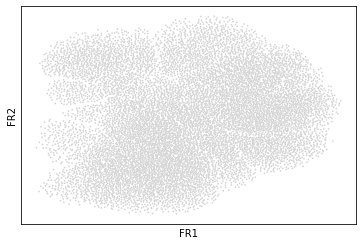

In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, legend_loc='on data')
sc.tl.umap(adata)


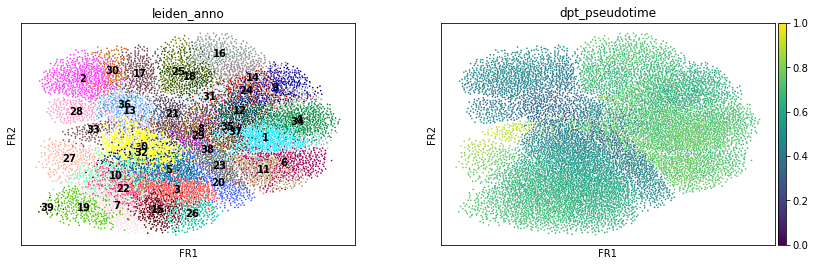

In [18]:
sc.pl.draw_graph(adata, color=['leiden_anno', 'dpt_pseudotime'], legend_loc='on data')


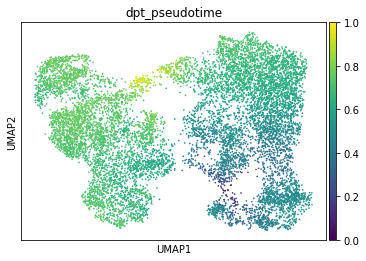

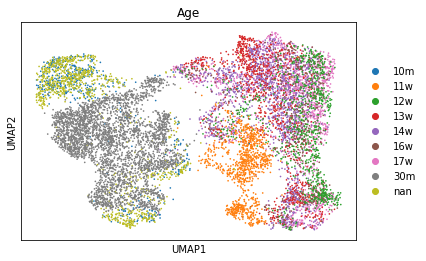

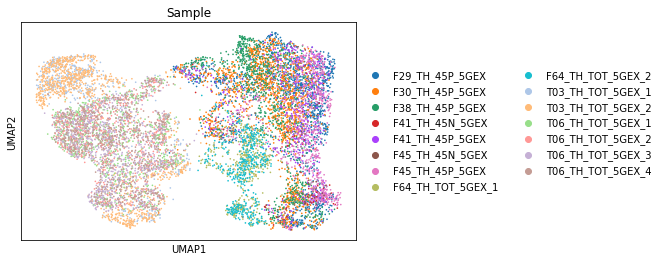

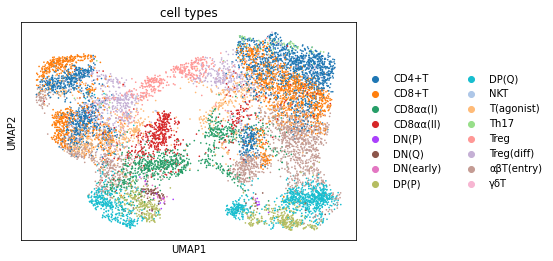

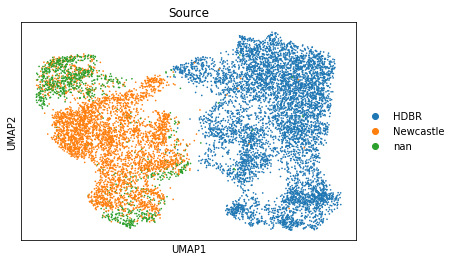

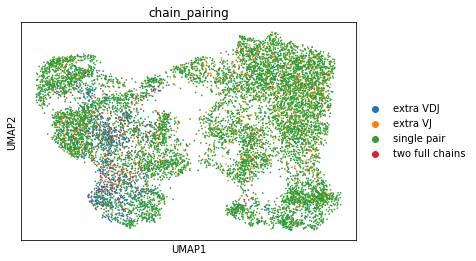

In [19]:
sc.pl.umap(adata, color=['dpt_pseudotime'])
sc.pl.umap(adata, color=['Age'])
sc.pl.umap(adata, color=['Sample'])
sc.pl.umap(adata, color=['cell types'])
sc.pl.umap(adata, color=['Source'])
sc.pl.umap(adata, color=['chain_pairing'])


In [20]:
"""paths = [('erythrocytes', [16, 12, 7, 13, 18, 6, 5, 10]),
         ('neutrophils', [16, 0, 4, 2, 14, 19]),
         ('monocytes', [16, 0, 4, 11, 1, 9, 24])]
         """

paths = [('1cluster', [28,36,17,29,23,20,2,30]),
         ('2cluster', [13,21,32,0,5,3,26,15,22,10,7,39]),
         ('3cluster', [27,33,38,11,1,8,6,4,35,34,12,37,9,24,31,14,31,16,18,25])]

In [21]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [22]:
adata.obs['clusters'] = adata.obs['leiden_anno']  # just a cosmetic change

In [23]:
adata.uns['clusters_colors'] = adata.uns['leiden_anno_colors']

ValueError: setting an array element with a sequence.

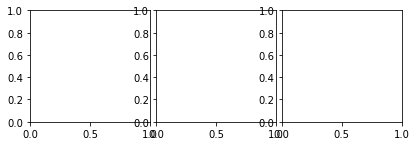

In [24]:
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.show()

In [ ]:
#adata.obs['Source']
hdbr = adata[adata.obs.Source =='HDBR', :]
newc= adata[adata.obs.Source =='Newcastle', :]


print(hdbr.obs['Age'])
#Name: Age, Length: 6137, dtype: category
#Categories (6, object): ['11w', '12w', '13w', '14w', '16w', '17w']
print(newc.obs['Age'])
#Name: Age, Length: 3826, dtype: category
#Categories (2, object): ['10m', '30m']

#adata.obs['leiden_anno']
for i in range(0,40):
    print(i)
    x=adata[adata.obs.leiden_anno ==str(i), :]
    print(x.obs['Age'])

#the two most promising for youngest cluster are cluster 36 with only 11 week data and cluster 23 with only 11 and 13 data
#we will set the root cluster as 36


